In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
pd.reset_option('^display.', silent=True)

In [96]:
data =  pd.read_csv('adult.data')
data

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [97]:
testData =  pd.read_csv('adult.test')
testData


,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [98]:
data.columns = ['age','work_class','fnlwgt','education','education-num',
              'marital-status','occupation','relationship','race',
              'sex','capital-gain','capital-loss','hours-per-week',
              'native-country','income']

data.columns



Index(['age', 'work_class', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [99]:
testData.columns = ['age','work_class','fnlwgt','education','education-num',
              'marital-status','occupation','relationship','race',
              'sex','capital-gain','capital-loss','hours-per-week',
              'native-country','income']

testData.columns

Index(['age', 'work_class', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [100]:
data = data[data.work_class != ' ?']
data = data[data.occupation != ' ?']

In [101]:
testData = testData[testData.work_class != ' ?']
testData = testData[testData.occupation != ' ?']
testData


,age,work_class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16274,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [121]:
df =  data[['age','work_class','education','occupation'
            ,'relationship','race'
            ,'sex','hours-per-week','income']]
df.columns

Index(['age', 'work_class', 'education', 'occupation', 'relationship', 'race',
       'sex', 'hours-per-week', 'income'],
      dtype='object')

In [123]:

dfTest =  testData[['age','work_class','education','occupation'
            ,'relationship','race'
            ,'sex','hours-per-week','income']]
dfTest.columns

#dfTest =  testData[['work_class','education','occupation','race','sex','hours-per-week','income']]
#dfTest.columns


Index(['age', 'work_class', 'education', 'occupation', 'relationship', 'race',
       'sex', 'hours-per-week', 'income'],
      dtype='object')

In [124]:
#work class
df = df.replace([' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Federal-gov', ' Local-gov', ' State-gov'
                 , ' Without-pay', ' Never-worked'],[1,2,3,4,5,6,7,8])


In [125]:
#work class
dfTest = dfTest.replace([' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Federal-gov', ' Local-gov', ' State-gov'
                 , ' Without-pay', ' Never-worked'],[1,2,3,4,5,6,7,8])

In [126]:
#relationship
df = df.replace([' Wife', ' Own-child', ' Husband', ' Not-in-family',
                     ' Other-relative', ' Unmarried'],[1,2,3,4,5,6])

In [127]:
#relationship
dfTest = dfTest.replace([' Wife', ' Own-child', ' Husband', ' Not-in-family', ' Other-relative',
                     ' Unmarried'],[1,2,3,4,5,6])

In [128]:
#education
df = df.replace([' Bachelors', ' Some-college', ' 11th', ' HS-grad', ' Prof-school', ' Assoc-acdm',
                 ' Assoc-voc', ' 9th', ' 7th-8th', ' 12th', ' Masters', ' 1st-4th', ' 10th', ' Doctorate', 
                 ' 5th-6th', ' Preschool'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [129]:
#education
dfTest = dfTest.replace([' Bachelors', ' Some-college', ' 11th', ' HS-grad', ' Prof-school', ' Assoc-acdm',
                 ' Assoc-voc', ' 9th', ' 7th-8th', ' 12th', ' Masters', ' 1st-4th', ' 10th', ' Doctorate', 
                 ' 5th-6th', ' Preschool'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [130]:
#occupation’
df = df.replace([' Tech-support', ' Craft-repair', ' Other-service', ' Sales', ' Exec-managerial', ' Prof-specialty', 
                 ' Handlers-cleaners', ' Machine-op-inspct', ' Adm-clerical', ' Farming-fishing', ' Transport-moving',
                 ' Priv-house-serv', ' Protective-serv', ' Armed-Forces'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])


In [131]:
# occupation’
dfTest = dfTest.replace([' Tech-support', ' Craft-repair', ' Other-service', ' Sales', ' Exec-managerial', ' Prof-specialty', 
                 ' Handlers-cleaners', ' Machine-op-inspct', ' Adm-clerical', ' Farming-fishing', ' Transport-moving',
                 ' Priv-house-serv', ' Protective-serv', ' Armed-Forces'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])


In [132]:
#race
df = df.replace([' White', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other', ' Black']
                ,[1,2,3,4,5])

In [133]:
#race
dfTest = dfTest.replace([' White', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other', ' Black']
                ,[1,2,3,4,5])

In [134]:
df = df.replace([' Female', ' Male']
                ,[1,2])
                           

In [135]:
dfTest = dfTest.replace([' Female', ' Male']
                ,[1,2])

In [136]:
df = df.replace([' >50K', ' <=50K']
                ,[0,1])

In [137]:
dfTest = dfTest.replace([' >50K.', ' <=50K.']
                ,[0,1])

In [138]:
df


,age,work_class,education,occupation,relationship,race,sex,hours-per-week,income
0,50,2,1,5,3,1,2,13,1
1,38,1,4,7,4,1,2,40,1
2,53,1,3,7,3,5,2,40,1
3,28,1,1,6,1,5,1,40,1
4,37,1,11,5,1,1,1,40,1
...,...,...,...,...,...,...,...,...,...
32555,27,1,6,1,1,1,1,38,1
32556,40,1,4,8,3,1,2,40,0
32557,58,1,4,9,6,1,1,40,1
32558,22,1,4,9,2,1,2,20,1


In [139]:
dfTest

,age,work_class,education,occupation,relationship,race,sex,hours-per-week,income
0,38,1,4,10,3,1,2,50,1
1,28,5,6,13,3,1,2,40,0
2,44,1,2,8,3,5,2,40,0
4,34,1,13,3,4,1,2,30,1
6,63,2,5,6,3,1,2,32,0
...,...,...,...,...,...,...,...,...,...
16274,33,1,1,6,2,1,2,40,1
16275,39,1,1,6,4,1,1,36,1
16277,38,1,1,6,3,1,2,50,1
16278,44,1,1,9,2,2,2,40,1


In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import time

In [140]:
X_train = df.iloc[:,0:8]
y_train = df['income']

In [155]:
knn = KNeighborsClassifier()
t0 = time.time()
result = knn.fit(X_train,y_train)
t1 = time.time()
total = t1-t0
total

0.30026769638061523

In [156]:
X_test = dfTest.iloc[:,0:8]
y_test = dfTest['income']

In [157]:
t0 = time.time()
y_pred = knn.predict(X_test)
t1 = time.time()
total = t1-t0
total


0.8435537815093994

In [158]:
print(y_pred)

[1 0 1 ... 0 0 1]


In [159]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7835967088938226


In [161]:
for k in np.arange(1, 100, 1):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    ac = accuracy_score(y_test, knn.predict(X_test))
    print(k)
    print(ac)

1
0.7513386443776936
2
0.7156849941230247
3
0.7748465456445083
4
0.7574768185973619
5
0.7835967088938226
6
0.7727569544207914
7
0.7855557006660572
8
0.7790910278176831
9
0.7898654825649732
10
0.7835967088938226
11
0.7909755779025728
12
0.7868616951808802
13
0.790191981193679
14
0.787188193809586
15
0.7926080710461016
16
0.7897348831134909
17
0.7947629619955596
18
0.7905184798223848
19
0.794958861172783
20
0.792738670497584
21
0.792803970223325
22
0.7907143789996082
23
0.7937181663837012
24
0.7907143789996082
25
0.7948282617213007
26
0.7905837795481259
27
0.792738670497584
28
0.7908449784510905
29
0.7918897740629489
30
0.7894083844847851
31
0.7912367768055374
32
0.7890165861303382
33
0.7916938748857255
34
0.7895389839362674
35
0.7916938748857255
36
0.7895389839362674
37
0.7902572809194202
38
0.7885594880501502
39
0.7894736842105263
40
0.7873840929868094
41
0.7883635888729267
42
0.7877758913412564
43
0.7888859866788559
44
0.7877105916155153
45
0.7898654825649732
46
0.7873840929868094
47


In [153]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

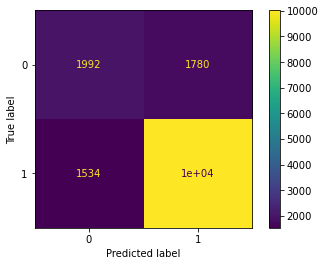

In [162]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()